In [23]:
import pandas as pd
data = pd.read_csv('~/Desktop/datasets/Global EV Data 2024.csv')
dat_cols=data.columns
#print(data[['region']].value_counts())

for i in dat_cols:
    print("the column " + i)
    print(data[[i]].value_counts(normalize=True))

# I am only interested in the EV stats of 3 countries: Japan, China, US 
# there are predictive data included in the dataset, so i will only
# be working with 2014-2023 worth of data of 10 years
# so filtering the data down to these

new_data= data[data['region'].isin(['China', 'USA', 'Japan']) & data['year'].isin(list(range(2014, 2024)))]


the column region
region              
World                   0.098783
Europe                  0.097519
China                   0.089932
Rest of the world       0.075391
USA                     0.058242
India                   0.055477
EU27                    0.033507
France                  0.028291
Netherlands             0.028291
United Kingdom          0.027264
Denmark                 0.025209
Belgium                 0.024498
Germany                 0.023550
Norway                  0.021337
Sweden                  0.021258
Japan                   0.020547
Spain                   0.019361
Switzerland             0.019361
Canada                  0.018966
Italy                   0.018176
Korea                   0.016517
Finland                 0.015805
Poland                  0.015331
Portugal                0.014936
New Zealand             0.014620
Brazil                  0.014462
Israel                  0.011696
Austria                 0.009167
Iceland                 0.009088
Chil

In [24]:
new_data.shape # okay now we have 1366 rows worth of data to work with 
new_data['category'].value_counts()
# i am also only interested in sales share rather than stock share
new_data = new_data[new_data['parameter'].isin(['EV sales'])]
new_data.shape # okay now we have 316 rows worth of data to work with


(316, 8)

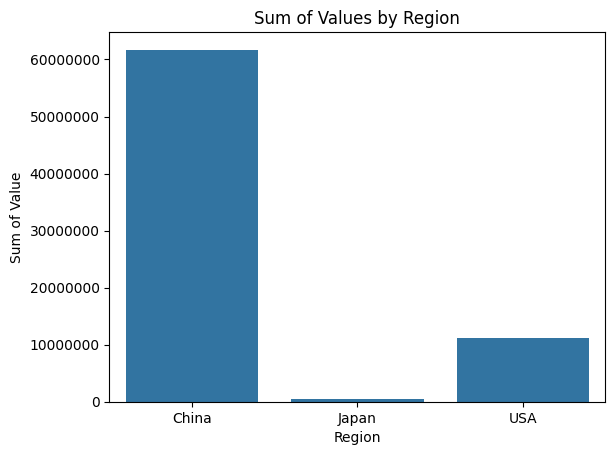

In [25]:
# okay now creating a general histogram of sales of EV cars within the 3 countries

import seaborn as sns
import matplotlib.pyplot as plt
region_sums = new_data.groupby('region')['value'].sum().reset_index()

sns.barplot(data=region_sums, x= 'region', y='value')

# Disable scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Sum of Value')
plt.title('Sum of Values by Region')

# Show the plot
plt.show()

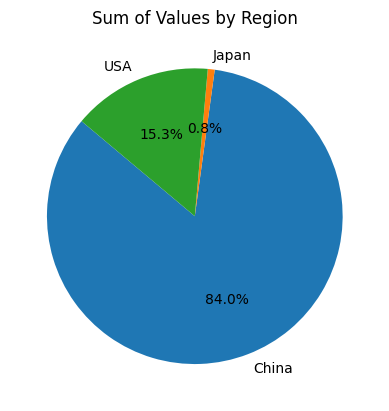

In [26]:
# Create the pie chart
plt.pie(region_sums['value'], labels=region_sums['region'], autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Sum of Values by Region')

# Show the plot
plt.show()


In [27]:
# okay now I want to export the dataset to a csv file 
# so I can visualize everything better in tableau 
new_data.to_csv('~/Desktop/datasets/three-country-ev.csv')